# House Price Prediction with Regression and Random Forest

L'objectif de ce projet est de prédire les prix des logements à l'aide d'un algorithme d'apprentissage automatique de base, la régression linéaire, et d'un algorithme avancé, Random Forest. Vous utiliserez également la régression avec régularisation telle que Ridge et Lasso pour essayer d'améliorer la précision de nos prédictions.

Les ensembles de données Kaggle House Prices peuvent être téléchargés [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/). 

# Partie A : Initialisation

- Importez les libraries nécéssaire

NB: s'il y a une librairie non disponible, il faut l'installer

In [624]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, scale, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Partie B: Exploration des données

Dans le dossier dataset, vous avez deux fichiers :
- Un fichier dénommé  train.csv
- Un fichier dénommé  test.csv

Utilisez la librarie pandas pour charger chacun de ces fichiers dans un dataframe.

- Pour le fichier train.csv, utilisez la variable df pour le charger dans un datfarme

- Pour le fichier test.csv, utilisez la variable test_df pour le charger dans un dataframe

In [625]:
df =pd.read_csv("dataset/train.csv")## Complétezx = x[~numpy.isnan(x)]
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [626]:
test_df = pd.read_csv("dataset/test.csv")## Complétez
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


- Quelle est la fonction qui permet de charger un fichier csv ? 

- Quelle fonction vous permet d'afficher  le nombre de ligne dans le dataframe ? 

- Quelle fonction vous permet d'afficher  le nombre de colonnes dans le dataframe ? 

- Que fait la fonction .head() de la librairie pandas ? 

- Appellez toutes les fonctions précédentes et affichez leurs sorties

In [234]:
read_csv# Quelle est la fonction qui permet de charger un fichier csv ?

In [ ]:
nom_dataframe.shape[0]#Quelle est la fonction qui permet de charger un fichier csv ?

In [ ]:
nom_dataframe.shape[1]#Quelle fonction vous permet d'afficher le nombre de colonnes dans le dataframe ?

In [ ]:
#Que fait la fonction .head() de la librairie pandas ?
.head()#permet d'afficher les 5 prmieres lignes d'un dataframe

In [ ]:
## Appellez les focntion ci-dessus

In [680]:
#Appellez toutes les fonctions précédentes et affichez leurs sorties
#Utilisons le DataFrame df
df=pd.read_csv("dataset/train.csv")
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [681]:
df.shape[0]

1460

In [682]:
df.shape[1]

81

In [683]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Que font les lignes de code ci-dessous ? Commentez-les ainsi que le résulat.

In [642]:
df.isnull().sum()                                                     
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]


In [631]:
df.isnull().sum()# somme des valeurs manquantes

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [661]:
miss_val = df.isnull().sum().sort_values(ascending=False)# somme des valeurs manquantes pour chaque colonne de df classée ordre decroissantes
miss_val

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [684]:
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])#création de dataFrame miss_val avec
#colonne MissvalCount et comme index les colonnes du dataframe df.
miss_val
#

,MissvalCount
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
...,...
ExterQual,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


In [685]:
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x :'{:.2f}'.format(float(x)/df.shape[0] * 100)) 
miss_val#ajout d'un nouveau colonne (Percent) dans miss_val contenant le pourcentage des valeurs de la colonne MissvalCount

,MissvalCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
...,...,...
ExterQual,0,0.00
Exterior2nd,0,0.00
Exterior1st,0,0.00
RoofMatl,0,0.00


In [686]:
miss_val = miss_val[miss_val.MissvalCount > 0]#l'ensemble des colonnes df ayant au moins une valeur manquante
miss_val

,MissvalCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


#- Supprimez toutes les colonnes ayant plus de 45% de valeurs manquantes

In [687]:
# suppression de colonnes
#pour récuper les valeurs de la colonne Percent
miss_val['Percent']=miss_val['Percent'].astype(float)# met la colonne Percent en type float
###complétez

<ipython-input-687-f8d579a5384d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miss_val['Percent']=miss_val['Percent'].astype(float)


In [688]:
miss_val=miss_val[(miss_val['Percent'] > 45)]#puis que les indexes de miss_val sont les colonnes de df,
#cette commande permet de selectionner les colonne df ayant 45% de valeur manquante
miss_val


,MissvalCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26


In [668]:
col_index=miss_val.index.tolist()#regroupement des colonne df ayant 45% de valeur manquante dans une liste
col_index



['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [689]:
for nom_col in col_index:
    df=df.drop(nom_col, axis=1)#suppression des colonne df ayant 45% de valeur manquante
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


- Supprimez les lignes ayant au moins une valeur manquante

In [690]:
# ligne avec valeur manquante
df=df.dropna()###Compléter
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

# Explore data

- Examinez la distribution de la variable SalePrice. s'agit-elle d'une distribution normale ? 

NB: pour examiner la distribution, il faut visualiser la courbe de distribution en utilisant la fonction sns.distplot(). voir la documentation [ici](https://seaborn.pydata.org/generated/seaborn.distplot.html)

C:\Users\hp\Documents\li\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

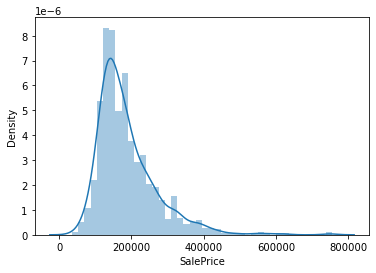

In [691]:
# Check distribution of target variable
ax = sns.distplot(df["SalePrice"])
ax

. Le resultat montre qu'il ne s'agit pas de distribution normale


- En utilisant la fonction np.log(), transformez les valeurs dans df['LogOfPrice'] en valeurs logarithmiques. 

NB: Il faut commencer par calculer la log des valeurs, ensuite remplacer les veleurs de df['LogOfPrice'] par le résultat, en déclarant une nouvelle colonne nommée 'LogOfPrice' et en supprimant la colonne 'SalePrice'

In [692]:
df['LogOfPrice'] = np.log(df['SalePrice'])# ajout d'une nouvelle colonne (LogOfPrice) dans df contenant la log des valeurs de la la colonne 'SalePrice'
df.head()


<ipython-input-692-9199e6f57e40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LogOfPrice'] = np.log(df['SalePrice'])# ajout d'un nouveau colonne (LogOfPrice) dan df contenant la log des valeurs de la la colonne 'SalePrice'


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogOfPrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,12.429216


In [693]:
df=df.drop(['SalePrice'], axis=1)# supression de la colonne 'SalePrice'
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogOfPrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


- Que fait la ligne de code ci-dessous ? Commentez

In [694]:
# Review the skewness of each feature
df.skew().sort_values(ascending=False)#Renvoie le biais de chaque colonne dans l'ordre decroissante

LotArea          15.508309
PoolArea         13.614615
3SsnPorch        11.069793
LowQualFinSF      9.896145
MiscVal           9.673292
KitchenAbvGr      5.587741
BsmtFinSF2        4.372440
BsmtHalfBath      4.049639
ScreenPorch       3.962075
EnclosedPorch     3.165433
MasVnrArea        2.695262
OpenPorchSF       2.382985
TotalBsmtSF       2.314581
LotFrontage       2.227272
BsmtFinSF1        1.931425
GrLivArea         1.553875
WoodDeckSF        1.525006
MSSubClass        1.428836
1stFlrSF          1.371529
BsmtUnfSF         0.884701
OverallCond       0.862376
2ndFlrSF          0.790156
GarageArea        0.726787
TotRmsAbvGrd      0.721070
Fireplaces        0.629886
HalfBath          0.607079
BsmtFullBath      0.532962
LogOfPrice        0.304486
OverallQual       0.298295
GarageCars        0.210251
MoSold            0.168709
YrSold            0.122460
Id                0.020785
FullBath          0.019856
BedroomAbvGr      0.016689
YearRemodAdd     -0.585271
YearBuilt        -0.633765
G

# Partie C : Train-Test Split dataset

Avant de pouvoir commencer à modéliser les données, nous devons diviser l'ensemble de données en ensemble d'apprentissage et de test.

- Commentez le plus clair possible les lignes de code ci-dessous

In [696]:
y = df.LogOfPrice # affecte y à la colonne LogofPrice, y est la variable à expliquée
df_temp = df.select_dtypes(include=["int64","float64"])# le dataframe df_temp contient tous les colonnes qui sont dans df de type int64 ou float64 
X = df_temp.drop(["LogOfPrice"],axis=1)# x renferme tous les colonne du dataframe df_temp excepté LogofPrice, x est la variable explicatif

- Subdivisez le jeux de données en :

- 75% de train
- 25% de test

NB: pour cela, utilisez la fonction train_test_split. Voir docummentation [ici](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [697]:
# split the dataset into train and test sets
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)## Complétez

# Partie D: Modélisation

Dans cette partie, vous allez construire quatre modèles et évaluer leurs performances avec la métrique R-squared. 

- Régression linéaire : complétez les lignes de code ci-dessous

In [698]:
lr = LinearRegression()
# fit optimal linear regression line on training data, this performs gradient descent under the hood
lr.fit(X_train, y_train)## Complétz

LinearRegression()

In [699]:
# given our model and our fit, predict y_values using X_test set
yr_hat = lr.predict(X_test)## Complétez


In [728]:
# evaluate the algorithm with a test set 
lr_score = lr.score(X_train, y_train)###completez  # train test 
print("Accuracy: ", lr_score)

Accuracy:  0.8627606139195223


Calcule du R2

In [729]:
lr_cv = cross_val_score(lr, X, y, cv = 5, scoring= 'r2')
print("R2: ", lr_cv.mean())

R2:  0.8178526186867077


- Regularization : Complétez les lignes de code ci-dessous

## Ridge Regression

In [702]:
ridge = Ridge(alpha = 1)  # sets alpha to a default value as baseline  
ridge.fit(X, y.ravel())## Complétez

ridge_cv = cross_val_score(ridge, X, y, cv = 5, scoring = 'r2')
print ("Cross-validation results: ", ridge_cv)
print ("R2: ", ridge_cv.mean())

Cross-validation results:  [0.88428067 0.83605927 0.86144661 0.89217415 0.61559687]
R2:  0.8179115118636048


## Lasso Regression

In [703]:
lasso = Lasso(alpha = .001)  # sets alpha to almost zero as baseline
lasso.fit(X, y.ravel())## Compétez

lasso_cv = cross_val_score(lasso, X, y, cv = 5, scoring = 'r2')
print ("Cross-validation results: ", lasso_cv)
print ("R2: ", lasso_cv.mean())

Cross-validation results:  [0.88474308 0.83495207 0.8596755  0.8932596  0.61075654]
R2:  0.8166773577482322


C:\Users\hp\Documents\li\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2132240065852145, tolerance: 0.01704029694169932
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\Documents\li\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0124022105056323, tolerance: 0.013611034250157878
  model = cd_fast.enet_coordinate_descent(


- Comparez les valeurs de R2 de ces deux modèles. Que pouvez-vous conclure ? 

-la valeur de R2 de Ridge regression est legerement supérieure que celle de Lasso regression.
on peut conclure que Ridge est plus fiable que Lasso dans cette etude.

## Random Forest


In [704]:
#rfr = RandomForestRegressor(n_estimators = 100, max_depth = 5, min_samples_leaf= 5, max_features = 'sqrt')  # using GridSearch
rfr = RandomForestRegressor()
rfr.fit(X, y)## Complétez
rfr_cv = cross_val_score(rfr,X, y, cv = 5, scoring = 'r2')
print("R2: ", rfr_cv.mean())

R2:  0.8605918950686181


- Ce dernier modèle est-il meilleur que les trois premiers ? Pourquoi ?
-Oui,parcequ'il a la plus grande R2

# Plotting the Feature Importance

Visualiser les variables les plus influentes dans la prédiction de la variable cible

In [724]:
# Random forest determined feature importances
rfr.feature_importances_

array([7.28726574e-03, 3.03763414e-03, 1.15845529e-02, 1.58717310e-02,
       5.93639084e-01, 1.91272512e-02, 2.80683984e-02, 1.80066094e-02,
       2.95661320e-03, 2.28008365e-02, 4.77393575e-04, 7.51691590e-03,
       3.62475472e-02, 3.03608365e-02, 1.11168545e-02, 1.26565522e-04,
       1.08292737e-01, 1.44564247e-03, 2.95832801e-04, 4.96493701e-03,
       1.37851800e-03, 1.65314721e-03, 5.76534164e-04, 4.11991509e-03,
       4.05503300e-03, 7.47517860e-03, 2.13900912e-02, 1.43572677e-02,
       4.07953853e-03, 6.00465493e-03, 2.63273711e-03, 1.98824078e-04,
       7.71187299e-04, 1.11673760e-04, 6.08863486e-04, 5.07371072e-03,
       2.28788566e-03])

- Compilez simplement la cellule ci-dessous

In [727]:
importance = rfr.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]

- Visualisez dans un diagramme en barre les résultats de la cellule précédente.

NB: Utilisez matplotlib

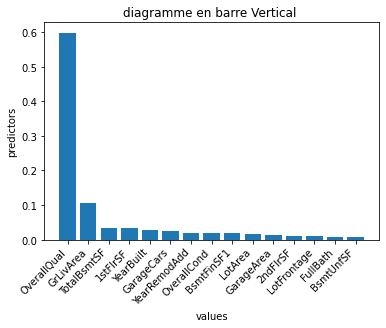

In [623]:
# Visualisez 
plt.bar(predictors,values) 
  
plt.xlabel("values")  
  
plt.ylabel("predictors")    
plt.title("diagramme en barre Vertical ") 
plt.xticks(rotation=45, ha='right')
plt.show() 

# Conclusion

Que pouvez-vous tirer comme conclusion :

    - quel est le meilleur modèle pour prédire le prix de la maison ?

    - Quelles sont les variables à retenir pour prédire le prix d'une maison ?

    - quel est le meilleur modèle pour prédire le prix de la maison ?

Le meilleur modèle pour prédire le prix de la maison est le Random Forest parceque elle a la plus grande R2, plus la valeur de R2 est proche de 1, plus les observations sont regroupées autour de la droite de régression, et par conséquent plus les erreurs de prédictions sont faibles.

    - Quelles sont les variables à retenir pour prédire le prix d'une maison ?
les variables à retenir pour prédire le prix d'une maison sont: OverallQual, GrLivArea, TotlBsmtSF, IstFlrSF, XearBuilt, GarageCar.
Car, si on se refere au diagramme en barre, ces variables sont plus significatif.